In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data/Air_quality_data.csv')

In [9]:
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
0,Delhi,2015-01-01,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,325.8,Very Poor
1,Mumbai,2015-01-01,70.5,312.7,195.0,42.0,122.5,31.5,7.22,83.8,108.0,262.7,Poor
2,Chennai,2015-01-01,174.1,275.4,56.2,68.8,230.9,28.5,8.56,60.8,43.9,341.8,Very Poor
3,Kolkata,2015-01-01,477.2,543.9,14.1,76.4,225.9,45.6,2.41,42.1,171.1,206.3,Poor
4,Bangalore,2015-01-01,171.6,117.7,123.3,12.4,61.9,49.7,1.26,79.7,164.3,339.8,Very Poor


In [12]:
X= df.drop(columns=['AQI'],axis=1)
Y= df['AQI']

In [4]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['year'] = df['Datetime'].dt.year
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.day
df.drop('Datetime', axis=1, inplace=True)


In [ ]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,year,month,day
0,Delhi,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,325.8,Very Poor,2015,1,1
1,Mumbai,70.5,312.7,195.0,42.0,122.5,31.5,7.22,83.8,108.0,262.7,Poor,2015,1,1
2,Chennai,174.1,275.4,56.2,68.8,230.9,28.5,8.56,60.8,43.9,341.8,Very Poor,2015,1,1
3,Kolkata,477.2,543.9,14.1,76.4,225.9,45.6,2.41,42.1,171.1,206.3,Poor,2015,1,1
4,Bangalore,171.6,117.7,123.3,12.4,61.9,49.7,1.26,79.7,164.3,339.8,Very Poor,2015,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        18265 non-null  object 
 1   PM2.5       18265 non-null  float64
 2   PM10        18265 non-null  float64
 3   NO          18265 non-null  float64
 4   NO2         18265 non-null  float64
 5   NOx         18265 non-null  float64
 6   NH3         18265 non-null  float64
 7   CO          18265 non-null  float64
 8   SO2         18265 non-null  float64
 9   O3          18265 non-null  float64
 10  AQI         18265 non-null  float64
 11  AQI_Bucket  18265 non-null  object 
 12  year        18265 non-null  int32  
 13  month       18265 non-null  int32  
 14  day         18265 non-null  int32  
dtypes: float64(10), int32(3), object(2)
memory usage: 1.9+ MB


In [23]:
from sklearn.compose import ColumnTransformer
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

numeric_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
categorical_cols = ['City', 'AQI_Bucket']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


In [24]:
X= preprocessor.fit_transform(X)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((14612, 20), (3653, 20))

In [32]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

In [41]:
models={
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "SVR": SVR(),
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, Y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_mae, train_rmse, train_r2 = evaluate_model(Y_train, train_preds)
    test_mae, test_rmse, test_r2 = evaluate_model(Y_test, test_preds)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('**************************')

    print("Performance of Training data")
    print(f"MAE: {train_mae}")
    print(f"RMSE: {train_rmse}")
    print(f"R2: {train_r2}")

    print("---------------------------")

    print("Performance of Testing data")
    print(f"MAE: {test_mae}")
    print(f"RMSE: {test_rmse}")
    print(f"R2: {test_r2}")
    r2_list.append(test_r2)

    print("====================================")

Linear Regression
**************************
Performance of Training data
MAE: 23.28935121817684
RMSE: 27.309178568540293
R2: 0.9421145179831376
---------------------------
Performance of Testing data
MAE: 23.496667122912676
RMSE: 27.63586853420789
R2: 0.9426653139853501
Lasso
**************************
Performance of Training data
MAE: 24.33508435081368
RMSE: 30.41882292027608
R2: 0.9281813579869007
---------------------------
Performance of Testing data
MAE: 24.850331813737387
RMSE: 31.446084343557256
R2: 0.9257657453622894
Ridge
**************************
Performance of Training data
MAE: 23.265915079364817
RMSE: 27.308166332501745
R2: 0.9421188090448367
---------------------------
Performance of Testing data
MAE: 23.514383082095165
RMSE: 27.663267749091844
R2: 0.9425515702021918
Decision Tree
**************************
Performance of Training data
MAE: 2.9837737658253316e-15
RMSE: 1.2852442214446664e-14
R2: 1.0
---------------------------
Performance of Testing data
MAE: 0.98902272

In [42]:
pd.DataFrame({'Model': model_list, 'R2_Score': r2_list}).sort_values(by='R2_Score', ascending=False)

,Model,R2_Score
4,Random Forest,0.999030
5,XGBRegressor,0.998723
6,CatBoosting Regressor,0.998662
3,Decision Tree,0.998587
7,AdaBoost Regressor,0.955867
0,Linear Regression,0.942665
2,Ridge,0.942552
1,Lasso,0.925766
8,SVR,0.813567


In [46]:
final_model=RandomForestRegressor()
final_model.fit(X_train, Y_train)
y_pred=final_model.predict(X_test)
score = r2_score(Y_test, y_pred)*100
print("Model Selected: RandomForestRegressor")
print("Accuracy of the model is %.2f" %score)

Model Selected: RandomForestRegressor
Accuracy of the model is 99.90


In [47]:
pred_diff=pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred,'Difference': Y_test - y_pred})
pred_diff.head()

,Actual,Predicted,Difference
856,262.2,262.231,-0.031
17865,260.1,259.012,1.088
17799,361.2,361.138,0.062
7515,485.5,485.585,-0.085
9406,238.1,237.929,0.171


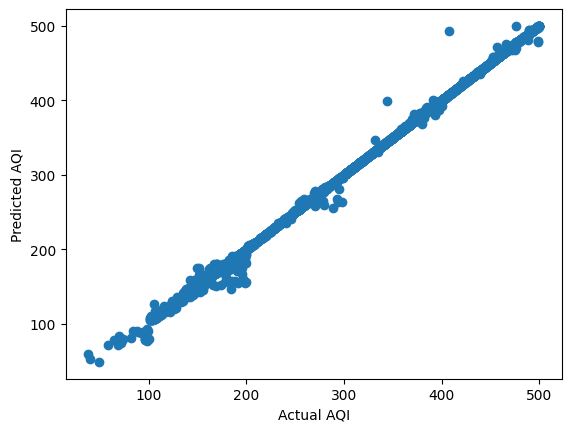

In [48]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.show()